In [7]:
#Imports
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# Get the current working directory
cwd = os.path.normpath(os.path.dirname(os.getcwd()))

def load_csv(file_path):
    """
    Function to load a CSV file into a pandas DataFrame.
    """
    full_path = os.path.join(cwd, file_path)
    return pd.read_csv(full_path, index_col=0)

#def process_dataframe(df, model_type):
    """
    Function to process a DataFrame and return average metrics.
    """
    average_metrics = df.groupby('architecture').agg({
        'train_time': 'mean',
        'avg_time_epoch': 'mean',
        'rmse': 'mean'
    }).reset_index()
    average_metrics['model_type'] = model_type
    return average_metrics

def process_dataframe(df, model_type):
    """
    Function to process a DataFrame and return average metrics along with boxplot statistics for RMSE.
    """
    # Calculate average metrics for 'train_time' and 'avg_time_epoch'
    average_metrics = df.groupby('architecture').agg({
        'train_time': 'mean',
        'avg_time_epoch': 'mean'
    }).reset_index()

    # Calculate boxplot statistics for RMSE
    rmse_stats = df.groupby('architecture')['rmse'].describe(percentiles=[.25, .5, .75])
    rmse_stats = rmse_stats[['min', '25%', '50%', '75%', 'max']]

    # Merge the average metrics with RMSE stats
    combined_metrics = pd.merge(average_metrics, rmse_stats, on='architecture')

    # Add model_type column
    combined_metrics['model_type'] = model_type

    return combined_metrics

In [3]:
# Define file paths for each CSV file
file_paths = {
    'FL_Grossload': [
        'Federatedlearning/TS_FL_Grossload_Forecasting_Benchmark/wandb/global_bilstm_all_results.csv',
        'Federatedlearning/TS_FL_Grossload_Forecasting_Benchmark/wandb/global_cnn_all_results.csv',
        'Federatedlearning/TS_FL_Grossload_Forecasting_Benchmark/wandb/global_transformer_all_results.csv',
        'Federatedlearning/TS_FL_Grossload_Forecasting_Moe/wandb/global_soft_bilstm_all_results.csv',
        'Federatedlearning/TS_FL_Grossload_Forecasting_Moe/wandb/global_topk_bilstm_all_results.csv',
        'Federatedlearning/TS_FL_Grossload_Forecasting_Moe/wandb/global_soft_dense_all_results.csv',
        'Federatedlearning/TS_FL_Grossload_Forecasting_Moe/wandb/global_topk_dense_all_results.csv'
    ],
    'LL_Grossload': [
        'Locallearning/TS_LL_Grossload_Forecasting_Benchmark/wandb/bilstm_all_results.csv',
        'Locallearning/TS_LL_Grossload_Forecasting_Benchmark/wandb/cnn_all_results.csv',
        'Locallearning/TS_LL_Grossload_Forecasting_Benchmark/wandb/transformer_all_results.csv',
        'Locallearning/TS_LL_Grossload_Forecasting_Moe/wandb/lstm_soft_moe_all_results.csv',
        'Locallearning/TS_LL_Grossload_Forecasting_Moe/wandb/lstm_topk_moe_all_results.csv',
        'Locallearning/TS_LL_Grossload_Forecasting_Moe/wandb/dense_soft_moe_all_results.csv',
        'Locallearning/TS_LL_Grossload_Forecasting_Moe/wandb/dense_topk_moe_all_results.csv'
    ],
    'FL_Prosumption': [
        'Federatedlearning/TS_FL_Prosumption_Forecasting_Benchmark/wandb/global_bilstm_all_results.csv',
        'Federatedlearning/TS_FL_Prosumption_Forecasting_Benchmark/wandb/global_cnn_all_results.csv',
        'Federatedlearning/TS_FL_Prosumption_Forecasting_Benchmark/wandb/global_transformer_all_results.csv',
        'Federatedlearning/TS_FL_Prosumption_Forecasting_Moe/wandb/global_soft_bilstm_all_results.csv',
        'Federatedlearning/TS_FL_Prosumption_Forecasting_Moe/wandb/global_topk_bilstm_all_results.csv',
        'Federatedlearning/TS_FL_Prosumption_Forecasting_Moe/wandb/global_soft_dense_all_results.csv',
        'Federatedlearning/TS_FL_Prosumption_Forecasting_Moe/wandb/global_topk_dense_all_results.csv'
    ],
    'LL_Prosumption': [
        'Locallearning/TS_LL_Prosumption_Forecasting_Benchmark/wandb/bilstm_all_results.csv',
        'Locallearning/TS_LL_Prosumption_Forecasting_Benchmark/wandb/cnn_all_results.csv',
        'Locallearning/TS_LL_Prosumption_Forecasting_Benchmark/wandb/transformer_all_results.csv',
        'Locallearning/TS_LL_Prosumption_Forecasting_Moe/wandb/lstm_soft_moe_all_results.csv',
        'Locallearning/TS_LL_Prosumption_Forecasting_Moe/wandb/lstm_topk_moe_all_results.csv',
        'Locallearning/TS_LL_Prosumption_Forecasting_Moe/wandb/dense_soft_moe_all_results.csv',
        'Locallearning/TS_LL_Prosumption_Forecasting_Moe/wandb/dense_topk_moe_all_results.csv'
    ],
    'FL_PV': [
        'Federatedlearning/TS_FL_PV_Forecasting_Benchmark/wandb/global_bilstm_all_results.csv',
        'Federatedlearning/TS_FL_PV_Forecasting_Benchmark/wandb/global_cnn_all_results.csv',
        'Federatedlearning/TS_FL_PV_Forecasting_Benchmark/wandb/global_transformer_all_results.csv',
        'Federatedlearning/TS_FL_PV_Forecasting_Moe/wandb/global_soft_bilstm_all_results.csv',
        'Federatedlearning/TS_FL_PV_Forecasting_Moe/wandb/global_topk_bilstm_all_results.csv',
        'Federatedlearning/TS_FL_PV_Forecasting_Moe/wandb/global_soft_dense_all_results.csv',
        'Federatedlearning/TS_FL_PV_Forecasting_Moe/wandb/global_topk_dense_all_results.csv'
    ],
    'LL_PV': [
        'Locallearning/TS_LL_PV_Forecasting_Benchmark/wandb/bilstm_all_results.csv',
        'Locallearning/TS_LL_PV_Forecasting_Benchmark/wandb/cnn_all_results.csv',
        'Locallearning/TS_LL_PV_Forecasting_Benchmark/wandb/transformer_all_results.csv',
        'Locallearning/TS_LL_PV_Forecasting_Moe/wandb/lstm_soft_moe_all_results.csv',
        'Locallearning/TS_LL_PV_Forecasting_Moe/wandb/lstm_topk_moe_all_results.csv',
        'Locallearning/TS_LL_PV_Forecasting_Moe/wandb/dense_soft_moe_all_results.csv',
        'Locallearning/TS_LL_PV_Forecasting_Moe/wandb/dense_topk_moe_all_results.csv'
    ],
    'FL_Totalload': [
        'Federatedlearning/TS_FL_Totalload_Forecasting_Benchmark/wandb/global_bilstm_all_results.csv',
        'Federatedlearning/TS_FL_Totalload_Forecasting_Benchmark/wandb/global_cnn_all_results.csv',
        'Federatedlearning/TS_FL_Totalload_Forecasting_Benchmark/wandb/global_transformer_all_results.csv',
        'Federatedlearning/TS_FL_Totalload_Forecasting_Moe/wandb/global_soft_bilstm_all_results.csv',
        'Federatedlearning/TS_FL_Totalload_Forecasting_Moe/wandb/global_topk_bilstm_all_results.csv',
        'Federatedlearning/TS_FL_Totalload_Forecasting_Moe/wandb/global_soft_dense_all_results.csv',
        'Federatedlearning/TS_FL_Totalload_Forecasting_Moe/wandb/global_topk_dense_all_results.csv'
    ],
    'LL_Totalload': [
        'Locallearning/TS_LL_Totalload_Forecasting_Benchmark/wandb/bilstm_all_results.csv',
        'Locallearning/TS_LL_Totalload_Forecasting_Benchmark/wandb/cnn_all_results.csv',
        'Locallearning/TS_LL_Totalload_Forecasting_Benchmark/wandb/transformer_all_results.csv',
        'Locallearning/TS_LL_Totalload_Forecasting_Moe/wandb/lstm_soft_moe_all_results.csv',
        'Locallearning/TS_LL_Totalload_Forecasting_Moe/wandb/lstm_topk_moe_all_results.csv',
        'Locallearning/TS_LL_Totalload_Forecasting_Moe/wandb/dense_soft_moe_all_results.csv',
        'Locallearning/TS_LL_Totalload_Forecasting_Moe/wandb/dense_topk_moe_all_results.csv'
    ]
}


In [4]:
# Load and process all DataFrames
all_results = []
for category, paths in file_paths.items():
    for path in paths:
        df = load_csv(path)
        processed_df = process_dataframe(df, category)
        all_results.append(processed_df)

# Concatenate all results into one DataFrame
combined_average_metrics = pd.concat(all_results, ignore_index=True)

In [6]:
#model_type = FL_Grossload, LL_Grossload, FL_Prosumption, LL_Prosumption, FL_PV, LL_PV, FL_Totalload, LL_Totalload
df_grossload = combined_average_metrics[combined_average_metrics['model_type'].str.contains("Grossload")]
df_prosumption = combined_average_metrics[combined_average_metrics['model_type'].str.contains("Prosumption")]
df_pv = combined_average_metrics[combined_average_metrics['model_type'].str.contains("PV")]
df_totalload = combined_average_metrics[combined_average_metrics['model_type'].str.contains("Totalload")]

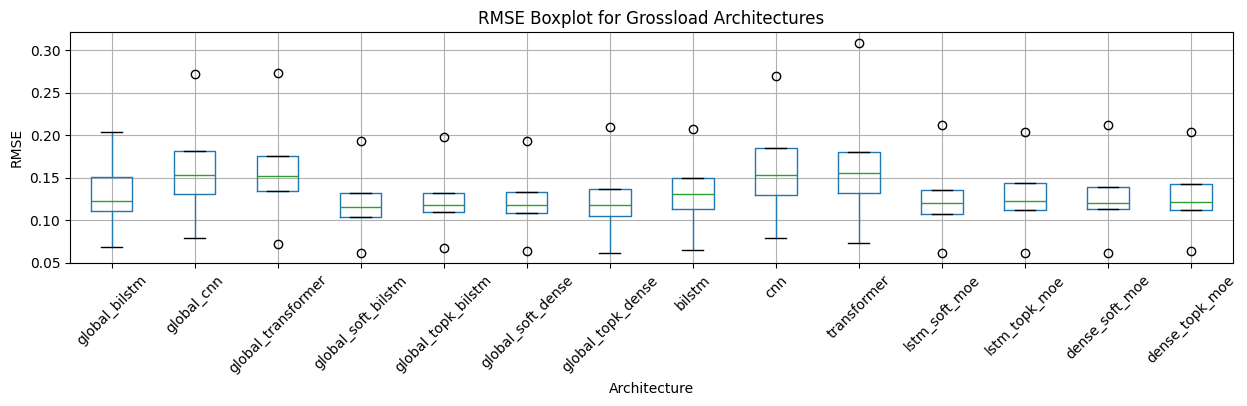

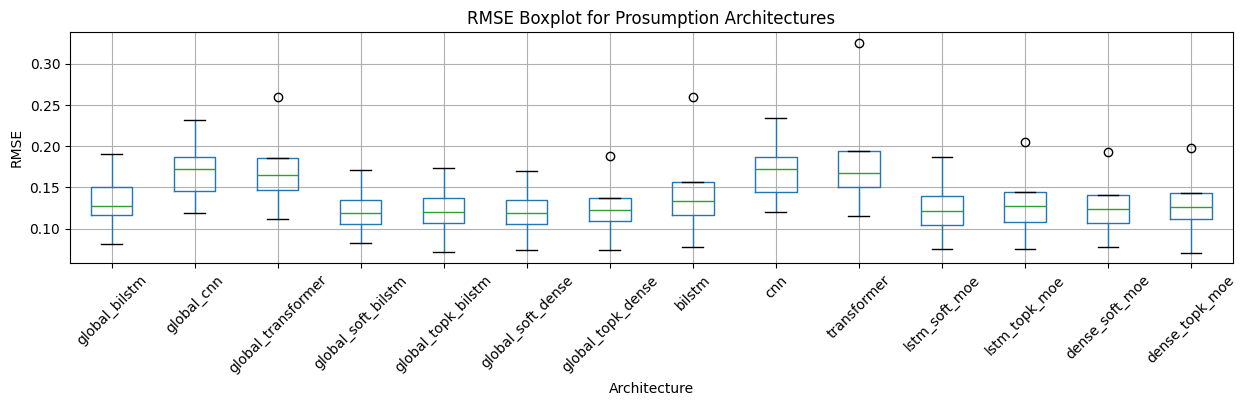

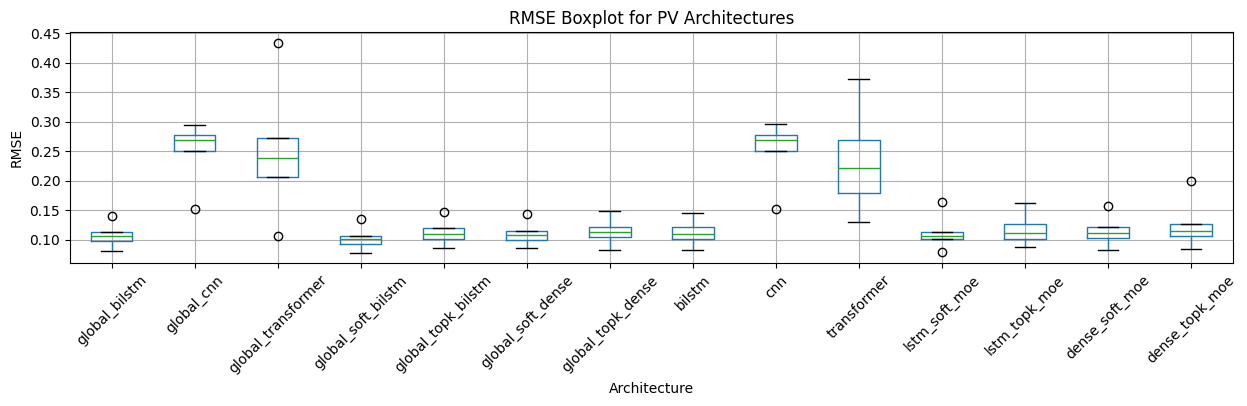

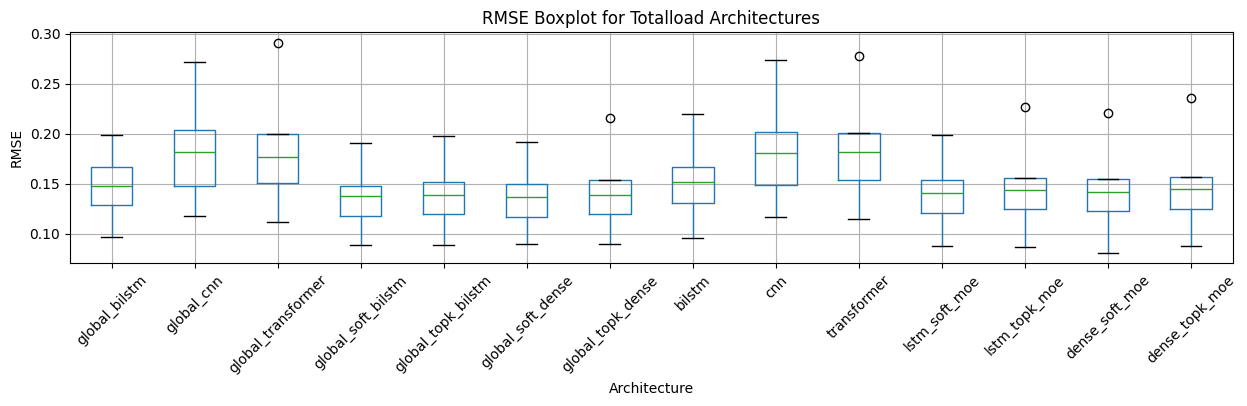

In [10]:
def plot_rmse_boxplot(df, title, figsize=(15, 3)):
    """
    Function to plot a boxplot for RMSE values in the given DataFrame.
    """
    boxplot_data = df.set_index('architecture')[['min', '25%', '50%', '75%', 'max']].T
    plt.figure(figsize=figsize)
    boxplot_data.boxplot()
    plt.xticks(rotation=45)
    plt.title(title)
    plt.xlabel('Architecture')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.show()

# Plotting boxplots for each DataFrame
plot_rmse_boxplot(df_grossload, 'RMSE Boxplot for Grossload Architectures')
plot_rmse_boxplot(df_prosumption, 'RMSE Boxplot for Prosumption Architectures')
plot_rmse_boxplot(df_pv, 'RMSE Boxplot for PV Architectures')
plot_rmse_boxplot(df_totalload, 'RMSE Boxplot for Totalload Architectures')